In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
batting_records = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/batting_records.csv')

Mounted at /content/drive


In [3]:
batting_records.head()

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113


In [4]:
batting_records.tail()

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
1995,L Sipamla,SA,2019-2021,9,2,1,8,8*,8.00,11,72.72,0,0,1,1,0
1996,BV Vitori,ZIM,2012-2016,11,2,2,8,7*,-,7,114.28,0,0,0,0,0
1997,Yasar Idrees,KUW,2019-2019,1,1,0,8,8,8.00,4,200.00,0,0,0,0,1
1998,Yasir Ali,BAN,2022-2022,1,1,0,8,8,8.00,7,114.28,0,0,0,1,0
1999,Al-Amin Hossain,BAN,2013-2020,31,6,4,7,5*,3.50,12,58.33,0,0,1,1,0


In [5]:
batting_records.describe()

,matches,innings,not_out,runs,balls_faced,strike_rate,100s,50s,duck,4s,6s
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,15.570000,11.909500,2.483000,200.152000,168.61950,106.713170,0.041500,0.823000,1.047000,17.074000,6.983000
std,17.601733,15.033573,3.496974,361.160788,277.25944,33.053929,0.244556,2.300069,1.468969,33.305212,14.560828
min,1.000000,1.000000,0.000000,7.000000,3.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,26.000000,30.00000,84.610000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,9.000000,7.000000,1.000000,72.000000,72.00000,106.660000,0.000000,0.000000,1.000000,5.000000,2.000000
75%,19.000000,14.000000,3.000000,197.000000,175.25000,126.400000,0.000000,1.000000,2.000000,17.000000,6.000000
max,125.000000,117.000000,42.000000,3313.000000,2413.00000,300.000000,4.000000,30.000000,12.000000,319.000000,165.000000


In [6]:
batting_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2000 non-null   object 
 1   country        1982 non-null   object 
 2   span           2000 non-null   object 
 3   matches        2000 non-null   int64  
 4   innings        2000 non-null   int64  
 5   not_out        2000 non-null   int64  
 6   runs           2000 non-null   int64  
 7   highest_score  2000 non-null   object 
 8   average        2000 non-null   object 
 9   balls_faced    2000 non-null   int64  
 10  strike_rate    2000 non-null   float64
 11  100s           2000 non-null   int64  
 12  50s            2000 non-null   int64  
 13  duck           2000 non-null   int64  
 14  4s             2000 non-null   int64  
 15  6s             2000 non-null   int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 250.1+ KB


In [7]:
batting_records.duplicated().sum()

0

In [8]:
batting_records.isnull().sum()

name              0
country          18
span              0
matches           0
innings           0
not_out           0
runs              0
highest_score     0
average           0
balls_faced       0
strike_rate       0
100s              0
50s               0
duck              0
4s                0
6s                0
dtype: int64

In [9]:
batting_records[batting_records.country.isnull()]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
627,Muhammad Amin,NaN,2021-2021,6,6,0,150,80,25.00,113,132.74,0,2,1,19,5
774,C Forbes,NaN,2021-2021,6,6,0,110,31,18.33,103,106.79,0,0,0,18,1
901,J Ghadiyali,NaN,2021-2021,6,6,1,86,27*,17.20,96,89.58,0,0,2,8,1
984,Naeem Gull,NaN,2021-2021,6,6,0,74,20,12.33,104,71.15,0,0,0,10,0
1048,Shehzad Patel,NaN,2021-2021,6,6,2,65,30*,16.25,54,120.37,0,0,0,4,4
1100,Muhammad Saleem,NaN,2019-2019,4,4,0,59,52,14.75,54,109.25,0,1,0,5,1
1160,G Caisley,NaN,2019-2019,4,4,0,52,38,13.00,59,88.13,0,0,1,3,2
1243,Yasar Haroon,NaN,2019-2019,4,4,0,45,29,11.25,62,72.58,0,0,0,4,1
1247,Ismat Ullah,NaN,2019-2019,4,4,0,44,42,11.00,47,93.61,0,0,1,4,1
1362,M Magagula,NaN,2021-2021,6,4,0,35,13,8.75,56,62.50,0,0,0,3,1


In [10]:
batting_records.dropna(axis=0,inplace=True)

In [11]:
batting_records.average.unique()

array(['32.48', '32.66', '51.50', '29.84', '34.69', '45.52', '32.74',
       '26.46', '28.58', '31.21', '34.51', '35.66', '32.59', '30.07',
       '23.83', '30.96', '21.21', '38.68', '26.15', '22.44', '27.92',
       '28.19', '40.68', '33.83', '31.89', '24.08', '31.34', '31.96',
       '26.00', '26.12', '25.96', '50.36', '31.01', '37.60', '29.29',
       '29.18', '25.30', '22.97', '26.53', '35.53', '26.78', '22.65',
       '19.93', '31.76', '25.80', '29.24', '25.36', '24.22', '30.93',
       '17.92', '21.93', '31.40', '33.60', '27.60', '21.13', '33.13',
       '22.01', '22.37', '28.15', '41.30', '23.15', '27.74', '26.44',
       '28.02', '37.93', '29.76', '24.10', '25.51', '18.03', '20.35',
       '19.66', '26.89', '23.50', '39.73', '22.02', '21.00', '20.93',
       '32.80', '31.67', '33.48', '21.11', '20.14', '24.25', '24.89',
       '36.38', '23.94', '38.87', '27.41', '34.33', '19.00', '35.72',
       '26.05', '31.60', '25.73', '25.44', '32.57', '26.70', '27.26',
       '36.77', '24.

In [12]:
batting_records.loc[batting_records.innings == batting_records.not_out].count()

name             54
country          54
span             54
matches          54
innings          54
not_out          54
runs             54
highest_score    54
average          54
balls_faced      54
strike_rate      54
100s             54
50s              54
duck             54
4s               54
6s               54
dtype: int64

In [13]:
batting_records[(batting_records.runs < 400) & (batting_records.country == 'INDIA')]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
265,V Sehwag,INDIA,2006-2012,19,18,0,394,68,21.88,271,145.38,0,2,1,43,16
276,AM Rahane,INDIA,2011-2016,20,20,2,375,61,20.83,331,113.29,0,1,2,32,6
295,SA Yadav,INDIA,2021-2022,14,12,3,351,65,39.00,212,165.56,0,4,1,32,20
321,RA Jadeja,INDIA,2009-2022,58,29,14,326,45*,21.73,262,124.42,0,0,2,25,8
361,Ishan Kishan,INDIA,2021-2022,10,10,1,289,89,32.11,238,121.42,0,2,0,34,8
411,RV Uthappa,INDIA,2007-2015,13,12,2,249,50,24.90,211,118.00,0,1,1,26,6
432,YK Pathan,INDIA,2007-2012,22,18,5,236,37*,18.15,161,146.58,0,0,3,11,17
563,SV Samson,INDIA,2015-2022,13,12,0,174,39,14.50,143,121.67,0,0,1,10,8
573,IK Pathan,INDIA,2006-2012,24,14,7,172,33*,24.57,144,119.44,0,0,0,9,7
581,M Vijay,INDIA,2010-2015,9,9,0,169,48,18.77,154,109.74,0,0,1,13,8


In [14]:
batting_records.loc[batting_records.innings == batting_records.not_out]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
1074,MD du Preez,NAM,2021-2021,3,2,2,62,33*,-,58,106.89,0,0,0,5,1
1088,Mohammad Adnan,Saudi,2019-2019,5,3,3,60,38*,-,31,193.54,0,0,0,4,5
1142,Yasir Mehmood,CYP,2021-2021,4,3,3,55,31*,-,52,105.76,0,0,0,2,3
1283,Imran Ameer,MLT,2022-2022,3,3,3,41,28*,-,33,124.24,0,0,0,4,0
1301,J Theron,SA/USA,2010-2021,13,5,5,40,31*,-,26,153.84,0,0,0,4,1
1309,KB Ahir,PNM,2019-2021,8,5,5,39,32*,-,41,95.12,0,0,0,5,1
1420,EF Beard,IOM,2021-2021,4,2,2,31,17*,-,23,134.78,0,0,0,2,1
1429,PA Nixon,ENG,2007-2007,1,1,1,31,31*,-,22,140.90,0,0,0,2,1
1446,MJ Swepson,AUS,2018-2021,7,4,4,30,14*,-,22,136.36,0,0,0,1,2
1458,T Tshose,BOT,2019-2021,5,4,4,29,21*,-,20,145.00,0,0,0,1,1


In [15]:
highest_scores = batting_records.loc[batting_records.innings == batting_records.not_out]['highest_score'].tolist()
highest_scores = [ x[:-1] for x in highest_scores ]
highest_scores = [ int(x) for x in highest_scores ] 

In [16]:
#batting_records.drop(batting_records[batting_records.innings == batting_records.not_out].index, inplace=True)
batting_records.loc[batting_records.average =='-', 'average'] = highest_scores

In [17]:
batting_records.loc[batting_records.innings == batting_records.not_out]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
1074,MD du Preez,NAM,2021-2021,3,2,2,62,33*,33,58,106.89,0,0,0,5,1
1088,Mohammad Adnan,Saudi,2019-2019,5,3,3,60,38*,38,31,193.54,0,0,0,4,5
1142,Yasir Mehmood,CYP,2021-2021,4,3,3,55,31*,31,52,105.76,0,0,0,2,3
1283,Imran Ameer,MLT,2022-2022,3,3,3,41,28*,28,33,124.24,0,0,0,4,0
1301,J Theron,SA/USA,2010-2021,13,5,5,40,31*,31,26,153.84,0,0,0,4,1
1309,KB Ahir,PNM,2019-2021,8,5,5,39,32*,32,41,95.12,0,0,0,5,1
1420,EF Beard,IOM,2021-2021,4,2,2,31,17*,17,23,134.78,0,0,0,2,1
1429,PA Nixon,ENG,2007-2007,1,1,1,31,31*,31,22,140.90,0,0,0,2,1
1446,MJ Swepson,AUS,2018-2021,7,4,4,30,14*,14,22,136.36,0,0,0,1,2
1458,T Tshose,BOT,2019-2021,5,4,4,29,21*,21,20,145.00,0,0,0,1,1


In [18]:
batting_records.shape

(1982, 16)

In [19]:
batting_records.average = batting_records.average.astype('float64')

In [20]:
batting_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1982 non-null   object 
 1   country        1982 non-null   object 
 2   span           1982 non-null   object 
 3   matches        1982 non-null   int64  
 4   innings        1982 non-null   int64  
 5   not_out        1982 non-null   int64  
 6   runs           1982 non-null   int64  
 7   highest_score  1982 non-null   object 
 8   average        1982 non-null   float64
 9   balls_faced    1982 non-null   int64  
 10  strike_rate    1982 non-null   float64
 11  100s           1982 non-null   int64  
 12  50s            1982 non-null   int64  
 13  duck           1982 non-null   int64  
 14  4s             1982 non-null   int64  
 15  6s             1982 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 263.2+ KB


In [21]:
batting_records.country.unique()

array(['INDIA', 'NZ', 'IRE', 'AUS', 'PAK', 'ENG', 'ICC/PAK', 'AFG', 'BAN',
       'SA', 'WI', 'SL', 'SA/World', 'BAN/ICC/World', 'SCOT', 'ZIM',
       'NED', 'ICC/SL/World', 'NEPAL', 'UAE', 'PNG', 'NAM', 'OMA', 'MAL',
       'KENYA', 'CZK-R', 'ROM', 'CAN', 'HKG', 'QAT', 'KUW', 'MLT', 'JER',
       'HKG/NZ', 'BUL', 'GIBR', 'UGA', 'WI/World', 'ENG/World', 'BHR',
       'SGP', 'NGA', 'ENG/ICC', 'AUS/World', 'GER', 'NED/SA', 'DEN',
       'ESP', 'BMUDA', 'ENG/IRE', 'ICC/INDIA', 'MOZ', 'Belg', 'NAM/SA',
       'VAN', 'GUE', 'Mald', 'AUS/ICC/NZ', 'LUX', 'Saudi', 'USA', 'Fin',
       'Bhm', 'MWI', 'Aut', 'TAN', 'USA/WI', 'ITA', 'Ghana', 'PORT',
       'HUN', 'RWN', 'BOT', 'Arg', 'NOR', 'SRB', 'PNM', 'AFG/ICC', 'Caym',
       'Blz', 'SWE', 'NZ/World', 'THAI', 'Mex', 'IOM', 'PHI', 'SEY',
       'EST', 'SLE', 'CYP', 'GRC', 'LES', '3', 'SUI', 'Fran', 'CRC',
       'Samoa', 'Peru', 'Chile', 'Iran', 'DEN/ENG', 'CAM', 'BHU',
       'ICC/NEPAL', 'TKY', 'SA/USA', 'ENG/ITA', 'AFG/GER', 'ICC/NZ', '2',
 

In [22]:
batting_records.loc[batting_records['country'] == 'ICC/SL/World']

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
61,NLTC Perera,ICC/SL/World,2010-2021,84,74,22,1204,61,23.15,794,151.63,0,3,8,88,64


In [23]:
batting_records.country.str.isnumeric().sum()

4

In [24]:
batting_records[batting_records['country'].isin (['1','2','3'])]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
719,Mohammad Nawaz,3,2016-2021,30,13,6,123,30*,17.57,92,133.69,0,0,2,9,7
1545,Rameez Raja,2,2011-2011,2,2,0,24,23,12.00,29,82.75,0,0,0,2,0
1747,Aftab Ahmed,2,2019-2021,4,3,0,15,10,5.00,27,55.55,0,0,0,1,0
1983,Mohammad Wasim,1,2021-2022,11,3,2,8,5,8.00,10,80.00,0,0,0,1,0


In [25]:
batting_records.loc[(batting_records['name'] == 'Aftab Ahmed') & (batting_records['country'] == '2'), 'country'] ='Den'
batting_records.loc[batting_records.country.str.isnumeric(),'country'] = 'Pak'

In [26]:
batting_records.country.str.isnumeric().sum()

0

In [27]:
batting_records.nunique(axis=0)

name             1973
country           111
span              160
matches            98
innings            88
not_out            27
runs              543
highest_score     228
average           854
balls_faced       507
strike_rate      1379
100s                5
50s                21
duck               12
4s                150
6s                 88
dtype: int64

In [28]:
batting_records.loc[batting_records['name'].duplicated(keep = False)]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
13,Mohammad Shahzad,AFG,2010-2021,70,70,3,2015,118*,30.07,1508,133.62,1,12,4,225,75
237,Yasir Ali,ESP,2019-2022,18,18,5,436,80*,33.53,418,104.30,0,2,2,29,17
337,Manpreet Singh,SGP,2019-2020,15,14,2,312,42*,26.00,267,116.85,0,0,0,21,6
367,Mohammad Shahzad,UAE,2015-2017,20,20,2,281,52,15.61,239,117.57,0,1,2,25,11
444,Aftab Ahmed,BAN,2006-2010,11,11,1,228,62*,22.80,178,128.08,0,1,0,26,6
604,Junaid Siddique,BAN,2007-2012,7,7,0,159,71,22.71,108,147.22,0,1,1,16,7
605,Manpreet Singh,ITA,2019-2021,14,12,1,159,36,14.45,187,85.02,0,0,1,13,2
683,Abdul Shakoor,ROM,2019-2022,13,9,3,131,31*,21.83,119,110.08,0,0,1,13,1
771,Sandeep Goud,OMA,2019-2022,22,12,4,111,31*,13.87,119,93.27,0,0,0,5,3
803,Sultan Ahmed,OMA,2015-2017,17,12,3,104,37*,11.55,83,125.30,0,0,3,14,0


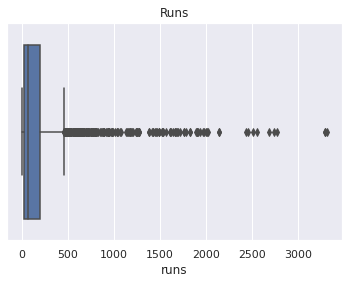

In [29]:
sns.boxplot(x='runs',data = batting_records)
plt.title("Runs")
plt.show()

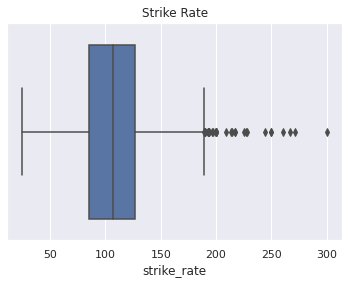

In [30]:
sns.boxplot(x='strike_rate',data = batting_records)
plt.title("Strike Rate")
plt.show()

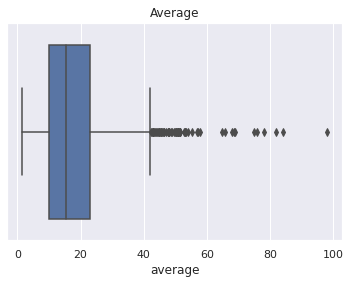

In [31]:
sns.boxplot(x='average',data = batting_records)
plt.title("Average")
plt.show()

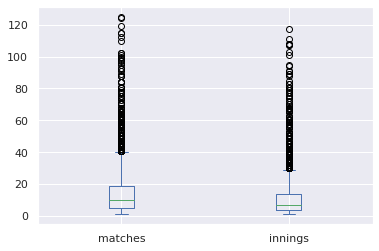

In [32]:
batting_records[['matches','innings']].plot(kind='box')
plt.show()

In [33]:
# Dropping Players who have played 4 innings or less
batting_records.drop(batting_records[(batting_records.innings <= 3) | (batting_records.balls_faced < 25)].index, inplace=True)

In [34]:
batting_records[batting_records['country'].str.contains('/')]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
9,Shoaib Malik,ICC/PAK,2006-2021,124,111,33,2435,75,31.21,1938,125.64,0,9,2,196,69
24,DA Miller,SA/World,2010-2021,95,83,27,1786,101*,31.89,1270,140.62,1,4,0,119,79
26,Tamim Iqbal,BAN/ICC/World,2007-2020,78,78,5,1758,103*,24.08,1503,116.96,1,7,6,188,45
40,F du Plessis,SA/World,2012-2020,50,50,7,1528,119,35.53,1137,134.38,1,10,0,140,50
50,Shahid Afridi,ICC/PAK,2006-2018,99,91,12,1416,54*,17.92,944,150.00,0,4,8,103,73
53,HM Amla,SA/World,2009-2018,44,44,6,1277,97*,33.60,967,132.05,0,8,2,146,26
61,NLTC Perera,ICC/SL/World,2010-2021,84,74,22,1204,61,23.15,794,151.63,0,3,8,88,64
153,MS Chapman,HKG/NZ,2014-2021,33,31,4,619,63*,22.92,525,117.90,0,2,1,53,17
167,DJG Sammy,WI/World,2007-2017,68,52,18,587,42*,17.26,398,147.48,0,0,3,45,31
168,PD Collingwood,ENG/World,2005-2017,36,33,2,583,79,18.80,459,127.01,0,3,3,37,24


In [35]:
batting_records['country'] = batting_records['country'].str.replace(r'/World','',regex=True)
batting_records['country'] = batting_records['country'].str.replace(r'/ICC','',regex=True)
batting_records['country'] = batting_records['country'].str.replace(r'ICC/','',regex=True)

In [36]:
batting_records[batting_records['country'].str.contains('/')]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
153,MS Chapman,HKG/NZ,2014-2021,33,31,4,619,63*,22.92,525,117.90,0,2,1,53,17
223,RE van der Merwe,NED/SA,2009-2021,46,32,12,460,75*,23.00,353,130.31,0,2,6,37,13
256,EC Joyce,ENG/IRE,2006-2014,18,15,3,405,78*,33.75,431,93.96,0,1,0,30,5
271,D Wiese,NAM/SA,2013-2022,36,27,9,387,66*,21.50,318,121.69,0,1,2,24,15
286,L Ronchi,AUS/NZ,2008-2018,33,26,6,359,51*,17.95,256,140.23,0,1,5,30,14
351,XM Marshall,USA/WI,2008-2021,20,18,1,300,47*,17.64,290,103.44,0,0,2,26,9
653,HR Walsh,USA/WI,2019-2022,31,15,5,140,28,14.00,143,97.90,0,0,2,9,4
1060,WB Rankin,ENG/IRE,2009-2020,50,15,8,64,16*,9.14,74,86.48,0,0,2,3,3
1189,A Khan,DEN/ENG,2009-2022,9,7,0,49,16,7.00,54,90.74,0,0,0,2,1
1301,J Theron,SA/USA,2010-2021,13,5,5,40,31*,31.00,26,153.84,0,0,0,4,1


In [37]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

In [38]:
batting_records[batting_records.country.isin(top10countries)].sort_values('100s', ascending=False)

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
15,GJ Maxwell,AUS,2012-2022,84,77,13,1982,145*,30.96,1287,154.00,3,9,1,164,97
27,C Munro,NZ,2012-2020,65,62,7,1724,109*,31.34,1102,156.44,3,11,5,132,107
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113
22,KL Rahul,INDIA,2016-2021,56,52,7,1831,110*,40.68,1285,142.49,2,16,4,164,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CJ Jordan,ENG,2014-2022,75,43,19,358,36,14.91,271,132.10,0,0,3,24,18
285,Nasir Jamshed,PAK,2012-2013,18,18,1,363,56,21.35,320,113.43,0,2,1,34,12
279,Nasir Hossain,BAN,2011-2016,31,24,4,370,50*,18.50,326,113.49,0,2,2,30,7
276,AM Rahane,INDIA,2011-2016,20,20,2,375,61,20.83,331,113.29,0,1,2,32,6


## KPI Extractions

In [39]:
batting_records[(batting_records['100s'] + batting_records['50s']) > 3]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,L Bruce,GIBR,2021-2022,15,15,2,476,99*,36.61,394,120.81,0,6,2,39,6
218,VB Chikkannaiah,GER,2019-2022,22,22,2,468,81*,23.40,488,95.90,0,4,1,35,11
221,R Pathan,CAN,2021-2022,11,11,2,463,107*,51.44,287,161.32,1,3,1,48,21
295,SA Yadav,INDIA,2021-2022,14,12,3,351,65,39.00,212,165.56,0,4,1,32,20


In [40]:
batting_records[(batting_records['100s']) > 0]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113
5,Babar Azam,PAK,2016-2022,74,69,10,2686,122,45.52,2075,129.44,1,26,3,278,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Dylan Steyn,CZK-R,2022-2022,6,6,0,252,106,42.00,165,152.72,1,1,0,31,6
431,RE Levi,SA,2012-2012,13,13,2,236,117*,21.45,167,141.31,1,1,3,20,15
452,MN van Wyk,SA,2007-2015,8,7,1,225,114*,37.50,157,143.31,1,1,0,19,14
472,LA Dunbar,SRB,2019-2021,6,6,2,214,104*,53.50,127,168.50,1,1,2,15,19


In [41]:
batting_records[(batting_records['50s']) > 3]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,HS Gericke,MLT,2020-2022,18,17,0,490,91,28.82,296,165.54,0,4,0,42,20
214,L Bruce,GIBR,2021-2022,15,15,2,476,99*,36.61,394,120.81,0,6,2,39,6
218,VB Chikkannaiah,GER,2019-2022,22,22,2,468,81*,23.40,488,95.90,0,4,1,35,11
295,SA Yadav,INDIA,2021-2022,14,12,3,351,65,39.00,212,165.56,0,4,1,32,20


In [42]:
batting_records['country'] = batting_records['country'].str.upper()

In [43]:
batting_records

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,H Helva,TKY,2019-2019,4,4,0,12,7,3.00,25,48.00,0,0,2,2,0
1868,Apon Mustafizur,SRB,2019-2021,4,4,0,11,11,2.75,37,29.72,0,0,3,2,0
1895,W Uisuk,THAI,2020-2020,4,4,0,11,5,2.75,40,27.50,0,0,0,1,0
1941,I Katzarski,BUL,2019-2022,13,4,0,9,4,2.25,28,32.14,0,0,1,0,0


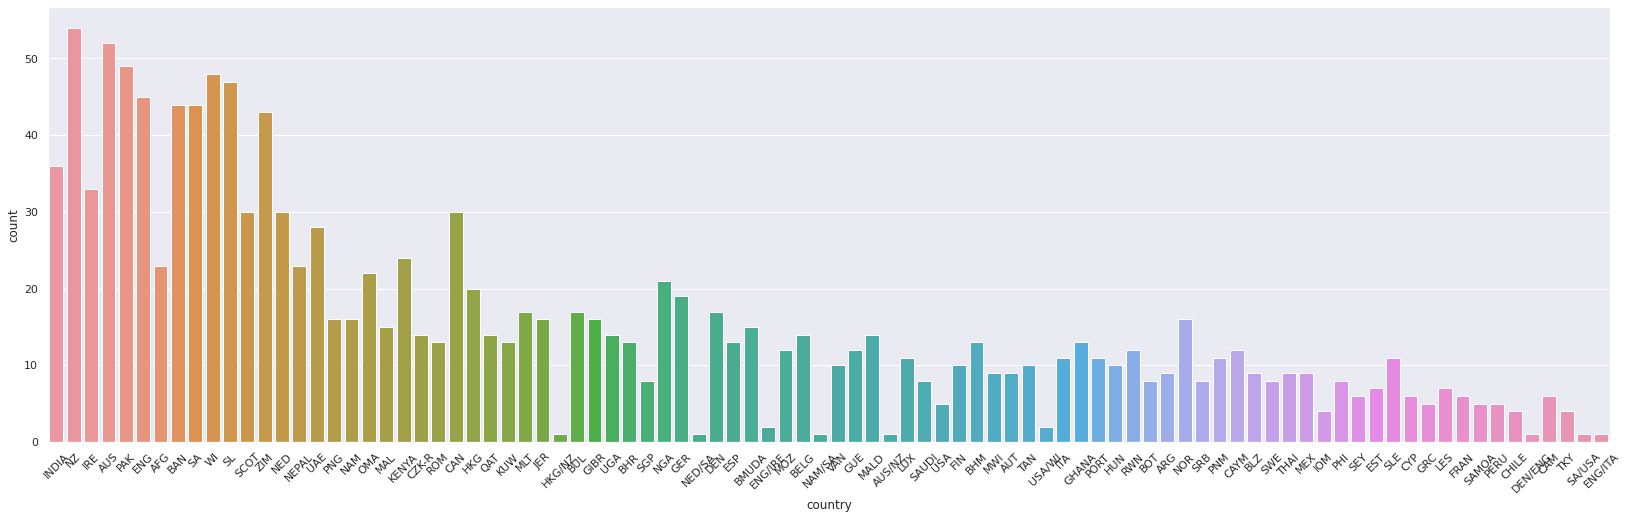

In [44]:
plt.figure(figsize=(28,8))
sns.countplot(x='country',data=batting_records)
plt.xticks(rotation=45)
plt.show()

In [45]:
batting_records_by_country = batting_records.groupby('country').count()
countries_with_atleast_15_batters = batting_records_by_country[batting_records_by_country.name >15].index

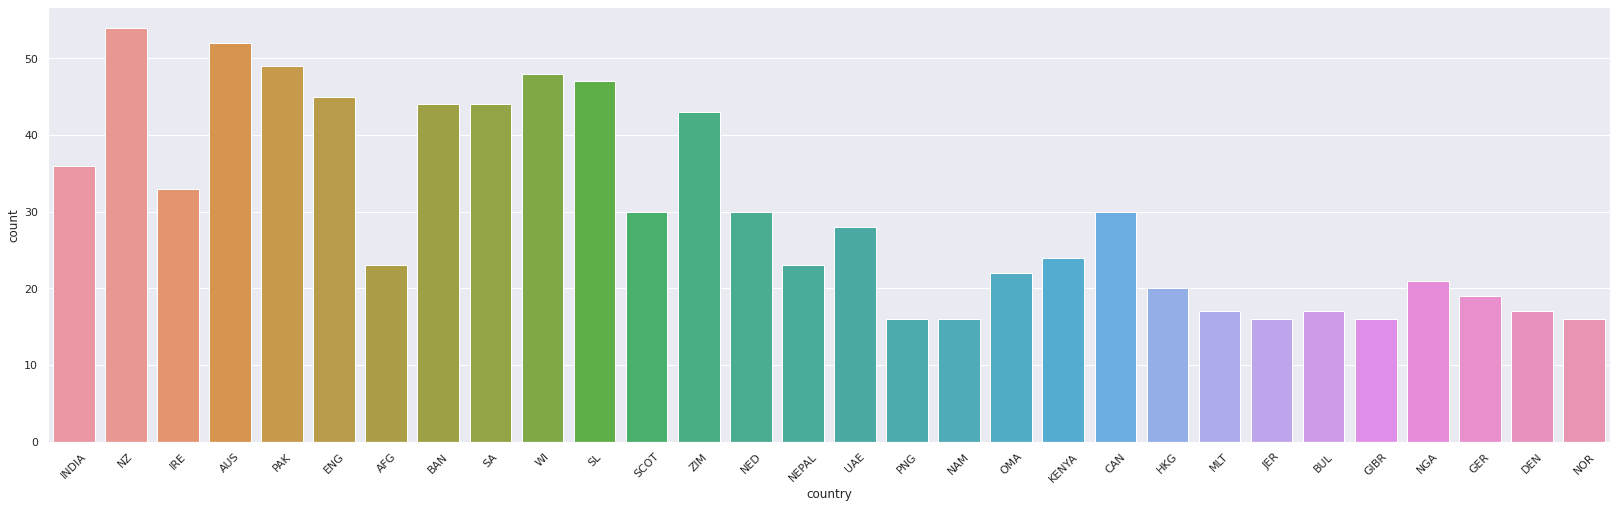

In [46]:
plt.figure(figsize=(28,8))
sns.countplot(x='country',data=batting_records[batting_records['country'].isin(countries_with_atleast_15_batters)])
plt.xticks(rotation=45)
plt.show()

## In Dissertation generate this plot from tableau(sort accending)


In [47]:
boundaries = (batting_records['4s'] + batting_records['6s'])
batting_records['boundary_per_ball'] = np.round(boundaries/batting_records['balls_faced'],3)

In [48]:
batting_records

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155,0.189
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165,0.187
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92,0.163
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96,0.201
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113,0.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,H Helva,TKY,2019-2019,4,4,0,12,7,3.00,25,48.00,0,0,2,2,0,0.080
1868,Apon Mustafizur,SRB,2019-2021,4,4,0,11,11,2.75,37,29.72,0,0,3,2,0,0.054
1895,W Uisuk,THAI,2020-2020,4,4,0,11,5,2.75,40,27.50,0,0,0,1,0,0.025
1941,I Katzarski,BUL,2019-2022,13,4,0,9,4,2.25,28,32.14,0,0,1,0,0,0.000


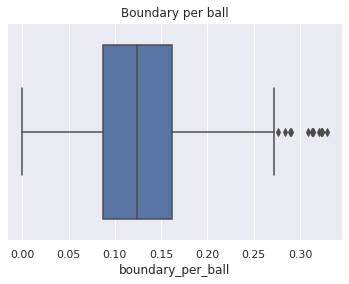

In [49]:
sns.boxplot(x='boundary_per_ball',data = batting_records)
plt.title("Boundary per ball")
plt.show()

In [50]:
batting_records.loc[batting_records['boundary_per_ball']>0.3].sort_values('boundary_per_ball',ascending=False)

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball
611,FH Allen,NZ,2021-2021,6,6,0,156,71,26.00,82,190.24,0,1,1,19,8,0.329
949,SC Kuggeleijn,NZ,2019-2021,18,8,4,79,35*,19.75,37,213.51,0,0,2,5,7,0.324
990,Khalid Ahmadi,BELG,2020-2021,9,6,4,73,31*,36.50,37,197.29,0,0,0,9,3,0.324
1109,ED Silva,KUW,2021-2021,4,4,1,58,58,19.33,31,187.09,0,1,2,6,4,0.323
616,Hadisullah Tarakhel,BELG,2021-2021,5,5,1,154,78,38.50,84,183.33,0,1,0,16,11,0.321
147,Taranjeet Singh,ROM,2021-2022,14,14,2,633,110,52.75,347,182.42,1,5,1,79,30,0.314
306,Faisal Khan,SAUDI,2019-2021,11,11,1,337,83*,33.70,185,182.16,0,1,1,38,20,0.314
390,Zeeshan Kukikhel,HUN,2021-2021,4,4,0,263,82,65.75,150,175.33,0,3,0,37,10,0.313
618,Mirza Ahsan,AUT,2019-2021,8,7,4,153,52*,51.00,67,228.35,0,2,0,9,12,0.313
793,Sami Ullah,ROM,2020-2021,9,7,1,106,33,17.66,55,192.72,0,0,1,13,4,0.309


In [51]:
batting_records['boundary_index'] = np.round(boundaries / batting_records.innings,3) 

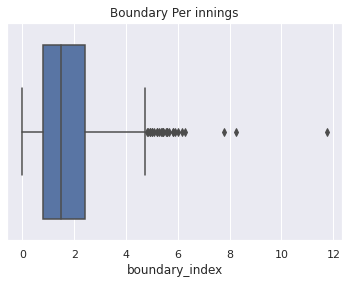

In [52]:
sns.boxplot(x='boundary_index',data = batting_records)
plt.title("Boundary Per innings")
plt.show()

In [53]:
batting_records.loc[batting_records['boundary_index']>5].sort_values('boundary_index',ascending=False)

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index
390,Zeeshan Kukikhel,HUN,2021-2021,4,4,0,263,82,65.75,150,175.33,0,3,0,37,10,0.313,11.750
372,Azhar Andani,PORT,2021-2021,4,4,0,276,100,69.00,179,154.18,1,1,0,27,6,0.184,8.250
147,Taranjeet Singh,ROM,2021-2022,14,14,2,633,110,52.75,347,182.42,1,5,1,79,30,0.314,7.786
221,R Pathan,CAN,2021-2022,11,11,2,463,107*,51.44,287,161.32,1,3,1,48,21,0.240,6.273
406,Dylan Steyn,CZK-R,2022-2022,6,6,0,252,106,42.00,165,152.72,1,1,0,31,6,0.224,6.167
197,Muhammad Waseem,UAE,2021-2022,12,12,1,506,112,46.00,330,153.33,2,3,1,40,32,0.218,6.000
109,S Davizi,CZK-R,2019-2022,19,19,2,779,115*,45.82,522,149.23,2,4,1,83,29,0.215,5.895
110,R Satheesan,ROM,2019-2022,23,21,4,775,92*,45.58,420,184.52,0,7,1,83,39,0.290,5.810
512,M Spoors,CAN,2022-2022,5,5,2,194,108*,64.66,141,137.58,1,1,1,24,5,0.206,5.800
472,LA Dunbar,SRB,2019-2021,6,6,2,214,104*,53.50,127,168.50,1,1,2,15,19,0.268,5.667


In [54]:
batting_records['finishing_index'] = np.round(batting_records['not_out'] / batting_records.innings, 3)

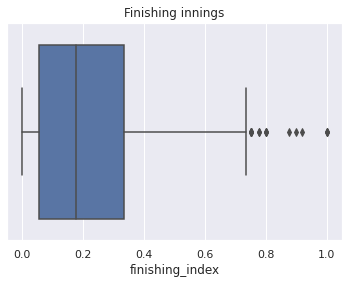

In [55]:
sns.boxplot(x='finishing_index',data = batting_records)
plt.title("Finishing innings")
plt.show()

In [56]:
batting_records.loc[(batting_records['finishing_index']>0.8)]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index
1176,HA Varaiya,KENYA,2007-2013,25,12,11,51,18*,51.0,81,62.96,0,0,0,1,0,0.012,0.083,0.917
1301,J Theron,SA/USA,2010-2021,13,5,5,40,31*,31.0,26,153.84,0,0,0,4,1,0.192,1.000,1.000
1309,KB Ahir,PNM,2019-2021,8,5,5,39,32*,32.0,41,95.12,0,0,0,5,1,0.146,1.200,1.000
1388,AF Milne,NZ,2010-2021,31,10,9,33,10*,33.0,33,100.00,0,0,0,1,1,0.061,0.200,0.900
1548,P Useni,NGA,2021-2021,16,8,7,24,7*,24.0,32,75.00,0,0,0,2,0,0.062,0.250,0.875
1677,Raza Hasan,PAK,2012-2014,10,4,4,18,13*,13.0,25,72.00,0,0,0,2,0,0.080,0.500,1.000


In [57]:
batting_records['duck_index'] = np.round(batting_records['duck'] / batting_records.innings, 3)

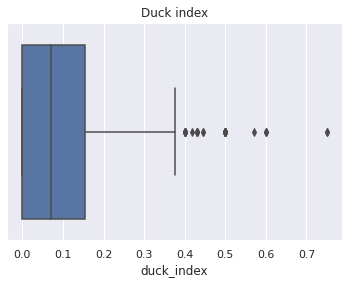

In [58]:
sns.boxplot(x='duck_index',data = batting_records)
plt.title("Duck index")
plt.show()

In [59]:
batting_records.loc[batting_records['duck_index']>0.35]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index
551,Imran Ali Butt,BHR,2019-2021,12,10,0,179,58,17.90,188,95.21,0,2,4,10,8,0.096,1.800,0.000,0.400
743,Shamsudheen Purat,SAUDI,2019-2020,6,5,1,118,88*,29.50,77,153.24,0,1,2,12,7,0.247,3.800,0.200,0.400
763,G Stewart,ITA,2021-2021,6,5,0,113,51,22.60,81,139.50,0,1,2,11,6,0.210,3.400,0.000,0.400
827,Irfan Bhima,MWI,2019-2019,4,4,0,98,52,24.50,88,111.36,0,1,2,13,2,0.170,3.750,0.000,0.500
842,MH Yardy,ENG,2006-2011,14,8,5,96,35*,32.00,72,133.33,0,0,3,9,1,0.139,1.250,0.625,0.375
861,BJ McCarthy,IRE,2017-2022,19,12,5,92,30*,13.14,76,121.05,0,0,5,7,4,0.145,0.917,0.417,0.417
967,NFI McCallum,SCOT,2007-2010,11,7,0,76,38,10.85,85,89.41,0,0,3,7,1,0.094,1.143,0.000,0.429
1067,LJ Barker,GUE,2019-2020,10,8,0,63,20,7.87,69,91.30,0,0,3,8,0,0.116,1.000,0.000,0.375
1072,Sultan Ahmed,UAE,2017-2021,23,14,5,63,18,7.00,63,100.00,0,0,5,1,4,0.079,0.357,0.357,0.357
1107,SK Atai,PNG,2019-2022,12,9,1,58,28*,7.25,49,118.36,0,0,4,5,1,0.122,0.667,0.111,0.444


In [60]:
runs_without_boundaries = batting_records.runs - (4*batting_records['4s'] + 6*batting_records['6s'])
batting_records['runs_without_boundary_index'] = np.round(runs_without_boundaries / batting_records.innings,3)                                   

In [61]:
batting_records

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155,0.189,3.829,0.128,0.060,10.350
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165,0.187,4.185,0.065,0.028,10.750
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92,0.163,4.382,0.281,0.034,17.438
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96,0.201,4.109,0.079,0.089,9.149
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113,0.204,4.337,0.112,0.079,10.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,H Helva,TKY,2019-2019,4,4,0,12,7,3.00,25,48.00,0,0,2,2,0,0.080,0.500,0.000,0.500,1.000
1868,Apon Mustafizur,SRB,2019-2021,4,4,0,11,11,2.75,37,29.72,0,0,3,2,0,0.054,0.500,0.000,0.750,0.750
1895,W Uisuk,THAI,2020-2020,4,4,0,11,5,2.75,40,27.50,0,0,0,1,0,0.025,0.250,0.000,0.000,1.750
1941,I Katzarski,BUL,2019-2022,13,4,0,9,4,2.25,28,32.14,0,0,1,0,0,0.000,0.000,0.000,0.250,2.250


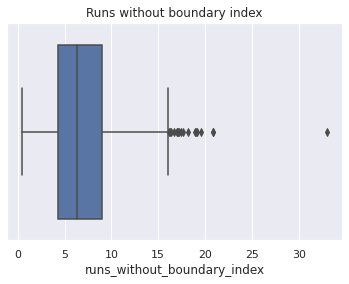

In [62]:
sns.boxplot(x='runs_without_boundary_index',data = batting_records)
plt.title("Runs without boundary index")
plt.show()

In [63]:
batting_records.loc[batting_records.runs_without_boundary_index > 15].sort_values('runs_without_boundary_index',ascending = False)

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index
372,Azhar Andani,PORT,2021-2021,4,4,0,276,100,69.00,179,154.18,1,1,0,27,6,0.184,8.250,0.000,0.000,33.000
161,BA Pai,GIBR,2019-2022,15,15,3,595,107*,49.58,472,126.05,1,4,0,54,11,0.138,4.333,0.200,0.000,20.867
598,A McAuley,IOM,2020-2021,5,5,1,162,45,40.50,164,98.78,0,0,0,13,1,0.085,2.800,0.200,0.000,20.800
366,A Bagai,CAN,2008-2013,9,9,2,284,67*,40.57,249,114.05,0,2,0,27,0,0.108,3.000,0.222,0.000,19.556
5,Babar Azam,PAK,2016-2022,74,69,10,2686,122,45.52,2075,129.44,1,26,3,278,42,0.154,4.638,0.145,0.043,19.159
658,AC Voges,AUS,2007-2013,7,5,2,139,51,46.33,114,121.92,0,1,0,8,2,0.088,2.000,0.400,0.000,19.000
214,L Bruce,GIBR,2021-2022,15,15,2,476,99*,36.61,394,120.81,0,6,2,39,6,0.114,3.000,0.133,0.133,18.933
398,Saim Hussain,BUL,2022-2022,6,6,1,257,108*,51.40,159,161.63,1,2,1,22,10,0.201,5.333,0.167,0.167,18.167
362,AN Kervezee,NED,2009-2012,10,10,1,289,58*,32.11,262,110.30,0,2,0,19,6,0.095,2.500,0.100,0.000,17.700
2,V Kohli,INDIA,2010-2022,97,89,25,3296,94*,51.50,2394,137.67,0,30,3,298,92,0.163,4.382,0.281,0.034,17.438


In [64]:
batting_records['big_match_index'] = np.round(((2 * batting_records['100s']) + batting_records['50s']) / batting_records.innings,3)

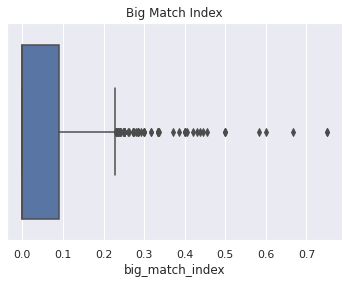

In [65]:
sns.boxplot(x='big_match_index',data = batting_records)
plt.title("Big Match Index")
plt.show()

In [66]:
batting_records.loc[(batting_records.big_match_index > 0.1) & batting_records.country.isin(top10countries)].sort_values('big_match_index',ascending = False)

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
345,ML Hayden,AUS,2005-2007,9,9,3,308,73*,51.33,214,143.92,0,4,0,37,13,0.234,5.556,0.333,0.000,9.111,0.444
452,MN van Wyk,SA,2007-2015,8,7,1,225,114*,37.50,157,143.31,1,1,0,19,14,0.210,4.714,0.143,0.000,9.286,0.429
5,Babar Azam,PAK,2016-2022,74,69,10,2686,122,45.52,2075,129.44,1,26,3,278,42,0.154,4.638,0.145,0.043,19.159,0.406
22,KL Rahul,INDIA,2016-2021,56,52,7,1831,110*,40.68,1285,142.49,2,16,4,164,73,0.184,4.558,0.135,0.077,14.173,0.385
60,DJ Malan,ENG,2017-2021,36,35,5,1239,103*,41.30,903,137.20,1,11,0,128,41,0.187,4.829,0.143,0.000,13.743,0.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,CA Ingram,SA,2010-2012,9,9,1,210,78,26.25,162,129.62,0,1,1,23,7,0.185,3.333,0.111,0.111,8.444,0.111
90,Liton Das,BAN,2015-2022,48,47,1,917,61,19.93,743,123.41,0,5,4,84,30,0.153,2.426,0.021,0.085,8.532,0.106
36,SK Raina,INDIA,2006-2018,78,66,11,1605,101,29.18,1190,134.87,1,5,3,145,58,0.171,3.076,0.167,0.045,10.258,0.106
319,RJ Nicol,NZ,2010-2013,21,19,0,327,58,17.21,296,110.47,0,2,2,33,11,0.149,2.316,0.000,0.105,6.789,0.105


In [67]:
batting_records[batting_records['100s'] > 0]

,name,country,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
0,RG Sharma,INDIA,2007-2022,125,117,15,3313,118,32.48,2374,139.55,4,26,7,293,155,0.189,3.829,0.128,0.060,10.350,0.291
1,MJ Guptill,NZ,2009-2021,112,108,7,3299,105,32.66,2413,136.71,2,20,3,287,165,0.187,4.185,0.065,0.028,10.750,0.222
3,PR Stirling,IRE,2009-2022,102,101,8,2776,115*,29.84,2061,134.69,1,20,9,319,96,0.201,4.109,0.079,0.089,9.149,0.218
4,AJ Finch,AUS,2011-2022,89,89,10,2741,172,34.69,1892,144.87,2,16,7,273,113,0.204,4.337,0.112,0.079,10.910,0.225
5,Babar Azam,PAK,2016-2022,74,69,10,2686,122,45.52,2075,129.44,1,26,3,278,42,0.154,4.638,0.145,0.043,19.159,0.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Dylan Steyn,CZK-R,2022-2022,6,6,0,252,106,42.00,165,152.72,1,1,0,31,6,0.224,6.167,0.000,0.000,15.333,0.500
431,RE Levi,SA,2012-2012,13,13,2,236,117*,21.45,167,141.31,1,1,3,20,15,0.210,2.692,0.154,0.231,5.077,0.231
452,MN van Wyk,SA,2007-2015,8,7,1,225,114*,37.50,157,143.31,1,1,0,19,14,0.210,4.714,0.143,0.000,9.286,0.429
472,LA Dunbar,SRB,2019-2021,6,6,2,214,104*,53.50,127,168.50,1,1,2,15,19,0.268,5.667,0.333,0.333,6.667,0.500


In [68]:
batting_records.describe()

,matches,innings,not_out,runs,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,19.850714,15.789286,3.167857,275.316429,18.953021,229.812857,109.212200,0.059286,1.161429,1.360000,23.561429,9.683571,0.124407,1.722287,0.211580,0.097247,6.880801,0.054154
std,19.102369,16.487542,3.912513,409.096720,10.228776,311.790289,28.321358,0.290521,2.675641,1.613152,37.975903,16.675879,0.057675,1.215380,0.187866,0.110682,3.459666,0.094235
min,4.000000,4.000000,0.000000,8.000000,2.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,8.000000,6.000000,1.000000,61.000000,11.500000,64.000000,90.360000,0.000000,0.000000,0.000000,4.000000,1.000000,0.087000,0.812000,0.056000,0.000000,4.250000,0.000000
50%,13.000000,10.000000,2.000000,126.500000,17.280000,118.500000,110.320000,0.000000,0.000000,1.000000,10.000000,4.000000,0.124000,1.500000,0.176500,0.071000,6.362000,0.000000
75%,24.250000,18.000000,4.000000,300.500000,24.285000,251.500000,127.370000,0.000000,1.000000,2.000000,25.000000,11.000000,0.161250,2.400000,0.333000,0.154000,9.010500,0.091000
max,125.000000,117.000000,42.000000,3313.000000,78.000000,2413.000000,228.350000,4.000000,30.000000,12.000000,319.000000,165.000000,0.329000,11.750000,1.000000,0.750000,33.000000,0.750000


In [69]:
batter = batting_records[['name','country','average','strike_rate','boundary_per_ball','boundary_index','finishing_index','runs_without_boundary_index','big_match_index']]

In [70]:
batter.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,18.953021,109.212200,0.124407,1.722287,0.211580,6.880801,0.054154
std,10.228776,28.321358,0.057675,1.215380,0.187866,3.459666,0.094235
min,2.000000,25.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,11.500000,90.360000,0.087000,0.812000,0.056000,4.250000,0.000000
50%,17.280000,110.320000,0.124000,1.500000,0.176500,6.362000,0.000000
75%,24.285000,127.370000,0.161250,2.400000,0.333000,9.010500,0.091000
max,78.000000,228.350000,0.329000,11.750000,1.000000,33.000000,0.750000


In [71]:
batter_for_clustering = batter.copy().drop(['name','country'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,32.48,139.55,0.189,3.829,0.128,10.350,0.291
1,32.66,136.71,0.187,4.185,0.065,10.750,0.222
2,51.50,137.67,0.163,4.382,0.281,17.438,0.337
3,29.84,134.69,0.201,4.109,0.079,9.149,0.218
4,34.69,144.87,0.204,4.337,0.112,10.910,0.225
...,...,...,...,...,...,...,...
1847,3.00,48.00,0.080,0.500,0.000,1.000,0.000
1868,2.75,29.72,0.054,0.500,0.000,0.750,0.000
1895,2.75,27.50,0.025,0.250,0.000,1.750,0.000
1941,2.25,32.14,0.000,0.000,0.000,2.250,0.000


# Prelim metric/Rank

In [72]:
batting_records['prelim_metric'] = np.round((batting_records['average'] * batting_records['strike_rate']) / 100,3)

In [73]:
batting_records[['name','country','runs','average','strike_rate','prelim_metric']]

,name,country,runs,average,strike_rate,prelim_metric
0,RG Sharma,INDIA,3313,32.48,139.55,45.326
1,MJ Guptill,NZ,3299,32.66,136.71,44.649
2,V Kohli,INDIA,3296,51.50,137.67,70.900
3,PR Stirling,IRE,2776,29.84,134.69,40.191
4,AJ Finch,AUS,2741,34.69,144.87,50.255
...,...,...,...,...,...,...
1847,H Helva,TKY,12,3.00,48.00,1.440
1868,Apon Mustafizur,SRB,11,2.75,29.72,0.817
1895,W Uisuk,THAI,11,2.75,27.50,0.756
1941,I Katzarski,BUL,9,2.25,32.14,0.723


In [74]:
batting_records[['name','country','runs','average','strike_rate','prelim_metric']].describe()

,runs,average,strike_rate,prelim_metric
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,275.316429,18.953021,109.212200,22.383954
std,409.096720,10.228776,28.321358,15.956009
min,8.000000,2.000000,25.000000,0.552000
25%,61.000000,11.500000,90.360000,10.897250
50%,126.500000,17.280000,110.320000,18.911500
75%,300.500000,24.285000,127.370000,29.630000
max,3313.000000,78.000000,228.350000,124.995000


In [75]:
batting_records.loc[((batting_records['prelim_metric'] > 30) & (batting_records.runs >= 500)), 'pre-rank'] = 'Best'
batting_records.loc[((batting_records['prelim_metric'] > 30) & (batting_records.runs < 500)), 'pre-rank'] = 'Good'
batting_records.loc[((batting_records['prelim_metric'] > 20) & (batting_records['prelim_metric'] < 30) ), 'pre-rank'] = 'Good'
batting_records.loc[((batting_records['prelim_metric'] > 10) & (batting_records['prelim_metric'] < 20)), 'pre-rank'] = 'Average'
batting_records.loc[((batting_records['prelim_metric'] < 10)), 'pre-rank'] = 'Poor'
batting_records.loc[(batting_records.runs < 100), 'pre-rank'] = 'Poor'

In [76]:
batting_records['pre-rank'].value_counts()

Poor       604
Good       456
Average    209
Best       131
Name: pre-rank, dtype: int64

In [77]:
batter['prelim_metric'] = batting_records['prelim_metric']
batter['pre-rank'] = batting_records['pre-rank']

In [78]:
batting_test = batter.sample(frac = 0.070 , random_state= 25)

In [79]:
batting_test.shape

(98, 11)

In [80]:
batting_train = batter.drop(batting_test.index)

In [81]:
batting_train.shape

(1302, 11)

In [82]:
batting_test['pre-rank'].value_counts()

Poor       50
Good       29
Best       10
Average     9
Name: pre-rank, dtype: int64

In [83]:
from pathlib import Path
filepath_batter_for_clustering = Path('batter_for_clustering.csv') 
batting_train.to_csv(filepath_batter_for_clustering,index=False)

filepath_batter_for_clustering = Path('batter_test.csv') 
batting_test.to_csv(filepath_batter_for_clustering,index=False)

In [84]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [85]:
columns = batter_for_clustering.columns.tolist()

# Feature Scaling

#### Normal Data

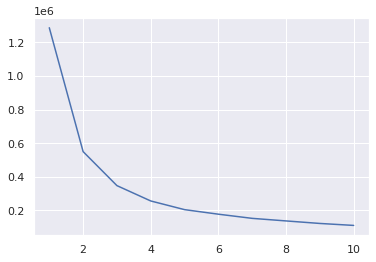

In [86]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

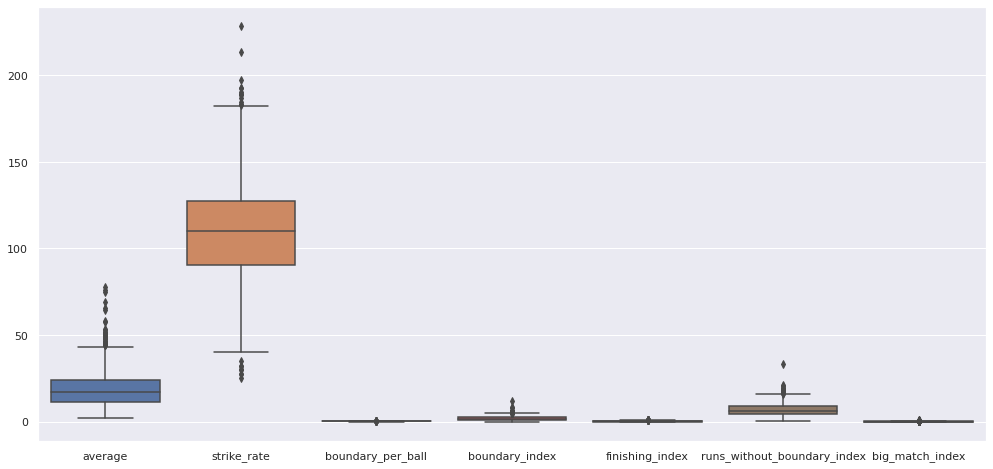

In [87]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_for_clustering)
plt.show()

In [88]:
batter_for_clustering.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,18.953021,109.212200,0.124407,1.722287,0.211580,6.880801,0.054154
std,10.228776,28.321358,0.057675,1.215380,0.187866,3.459666,0.094235
min,2.000000,25.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,11.500000,90.360000,0.087000,0.812000,0.056000,4.250000,0.000000
50%,17.280000,110.320000,0.124000,1.500000,0.176500,6.362000,0.000000
75%,24.285000,127.370000,0.161250,2.400000,0.333000,9.010500,0.091000
max,78.000000,228.350000,0.329000,11.750000,1.000000,33.000000,0.750000


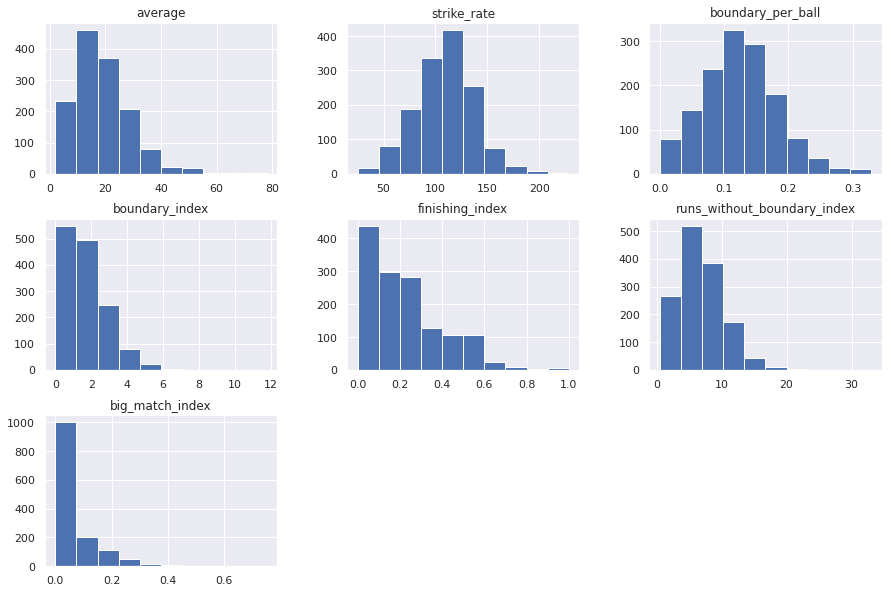

In [89]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_for_clustering.hist(ax=ax)
plt.show()

In [90]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.48417489242592493
For n_clusters = 3 The average silhouette_score is : 0.427172910577394
For n_clusters = 4 The average silhouette_score is : 0.4024804879697247
For n_clusters = 5 The average silhouette_score is : 0.3789989308176317
For n_clusters = 6 The average silhouette_score is : 0.3444540325515059
For n_clusters = 7 The average silhouette_score is : 0.357821615640624
For n_clusters = 8 The average silhouette_score is : 0.3483541756340547
For n_clusters = 9 The average silhouette_score is : 0.34324441928612115
For n_clusters = 10 The average silhouette_score is : 0.3518694987033261


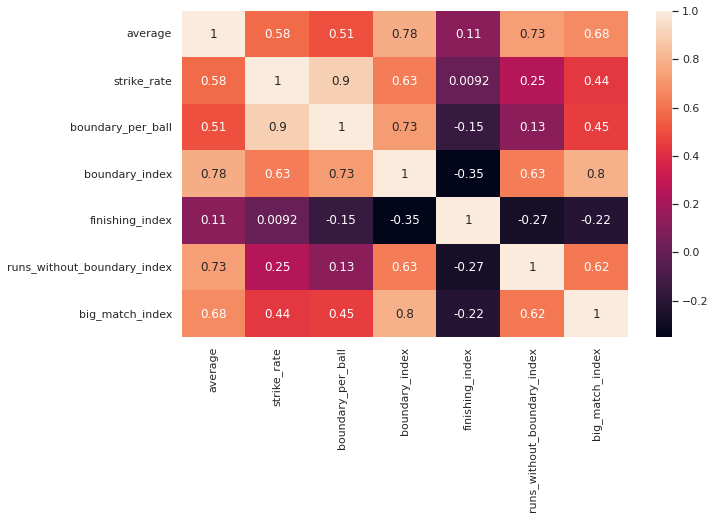

In [91]:
corr_normal = batter_for_clustering.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_normal,annot=True)

#### Standard Scaler

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_std_Scaler= scaler.fit_transform(batter_for_clustering)

batter_std_Scaler = pd.DataFrame(batter_std_Scaler,columns = columns)
batter_std_Scaler

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,1.322916,1.071581,1.120355,1.733997,-0.445051,1.003114,2.514264
1,1.340520,0.971268,1.085666,2.027014,-0.780516,1.118773,1.781788
2,3.183040,1.005177,0.669388,2.189162,0.369651,3.052598,3.002581
3,1.064728,0.899918,1.328494,1.964460,-0.705968,0.655846,1.739326
4,1.539050,1.259493,1.380528,2.152123,-0.530248,1.165037,1.813635
...,...,...,...,...,...,...,...
1395,-1.560179,-2.162116,-0.770237,-1.006042,-1.126631,-1.700425,-0.574872
1396,-1.584629,-2.807796,-1.221203,-1.006042,-1.126631,-1.772712,-0.574872
1397,-1.584629,-2.886210,-1.724205,-1.211813,-1.126631,-1.483563,-0.574872
1398,-1.633528,-2.722318,-2.157827,-1.417583,-1.126631,-1.338989,-0.574872


In [93]:
batter_std_Scaler.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1400.000000
mean,0.000000,-3.654220e-16,-1.624098e-16,-2.436147e-16,4.060244e-17,-1.624098e-16,0.000000
std,1.000357,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357
min,-1.657977,-2.974515e+00,-2.157827e+00,-1.417583e+00,-1.126631e+00,-1.844999e+00,-0.574872
25%,-0.728893,-6.658910e-01,-6.488224e-01,-7.492409e-01,-8.284395e-01,-7.606921e-01,-0.574872
50%,-0.163619,3.912933e-02,-7.061844e-03,-1.829605e-01,-1.867956e-01,-1.500105e-01,-0.574872
75%,0.521459,6.413636e-01,6.390349e-01,5.578132e-01,6.465428e-01,6.157994e-01,0.391146
max,5.774696,4.208145e+00,3.548638e+00,8.253629e+00,4.198215e+00,7.552328e+00,7.386818


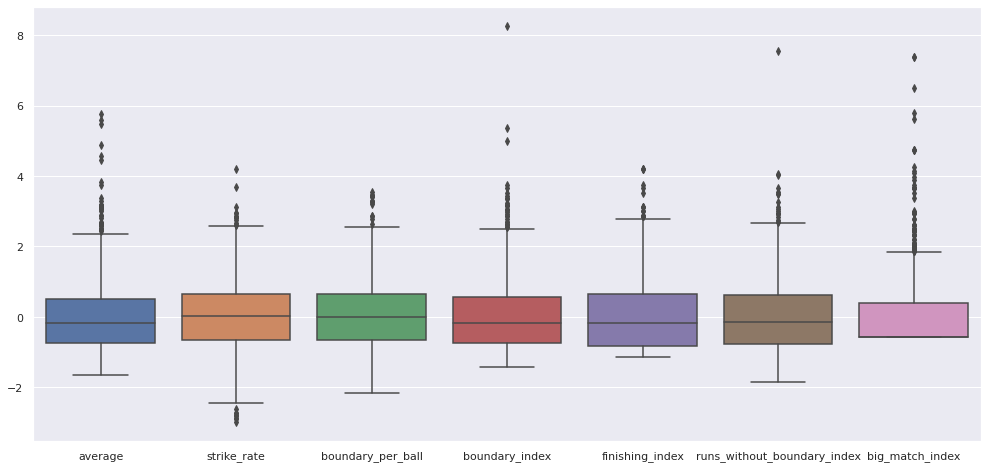

In [94]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_std_Scaler)
plt.show()

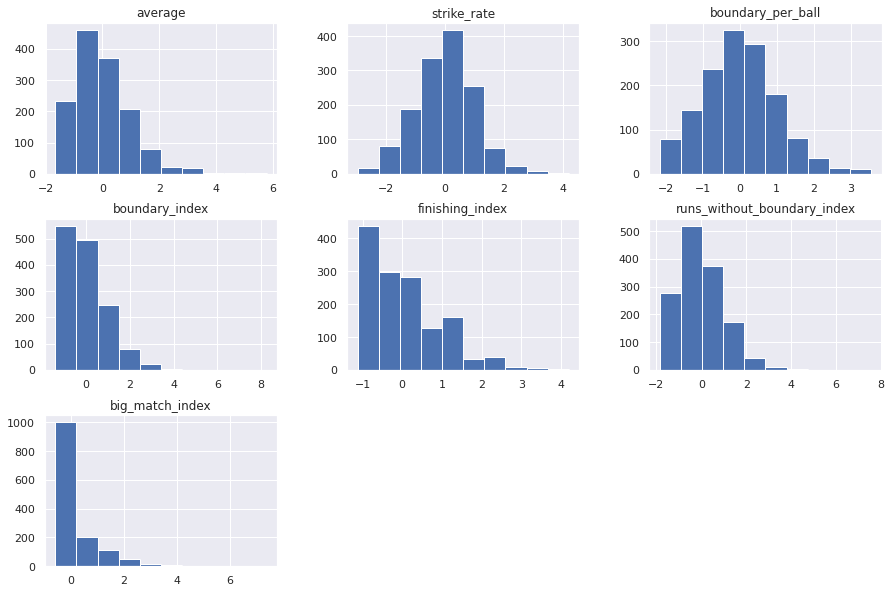

In [95]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_std_Scaler.hist(ax=ax)
plt.show()

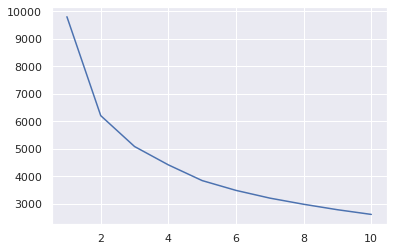

In [96]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_std_Scaler)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [97]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_std_Scaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_std_Scaler, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3355473743615212
For n_clusters = 3 The average silhouette_score is : 0.23899198903287447
For n_clusters = 4 The average silhouette_score is : 0.25166139999326764
For n_clusters = 5 The average silhouette_score is : 0.24410982878124782
For n_clusters = 6 The average silhouette_score is : 0.22791586145451412
For n_clusters = 7 The average silhouette_score is : 0.22494892935073754
For n_clusters = 8 The average silhouette_score is : 0.22218877416584526
For n_clusters = 9 The average silhouette_score is : 0.22115850840070725
For n_clusters = 10 The average silhouette_score is : 0.2220549963493807


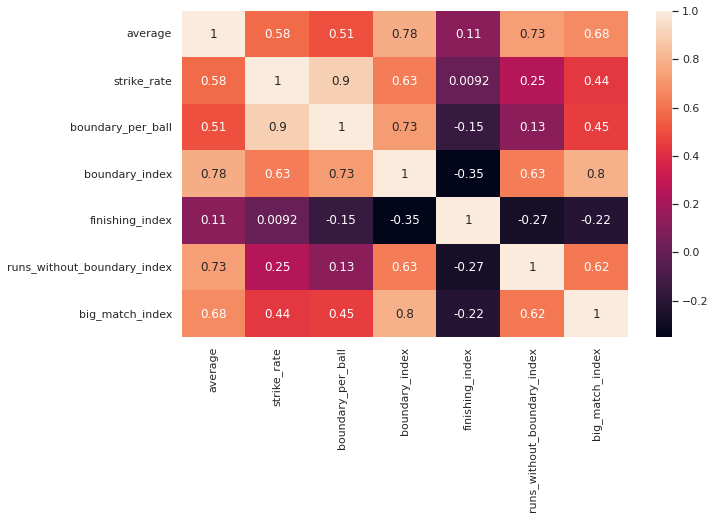

In [98]:
corr_std_scaler = batter_std_Scaler.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_std_scaler,annot=True)

#### Min-Max Scaler

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
batter_min_max_scaler= scaler.fit_transform(batter_for_clustering)

batter_min_max_scaler = pd.DataFrame(batter_min_max_scaler,columns = columns)
batter_min_max_scaler.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.223066,0.414124,0.378137,0.146578,0.211580,0.196332,0.072205
std,0.134589,0.139274,0.175302,0.103437,0.187866,0.106451,0.125646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.321416,0.264438,0.069106,0.056000,0.115385,0.000000
50%,0.201053,0.419572,0.376900,0.127660,0.176500,0.180369,0.000000
75%,0.293224,0.503418,0.490122,0.204255,0.333000,0.261862,0.121333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


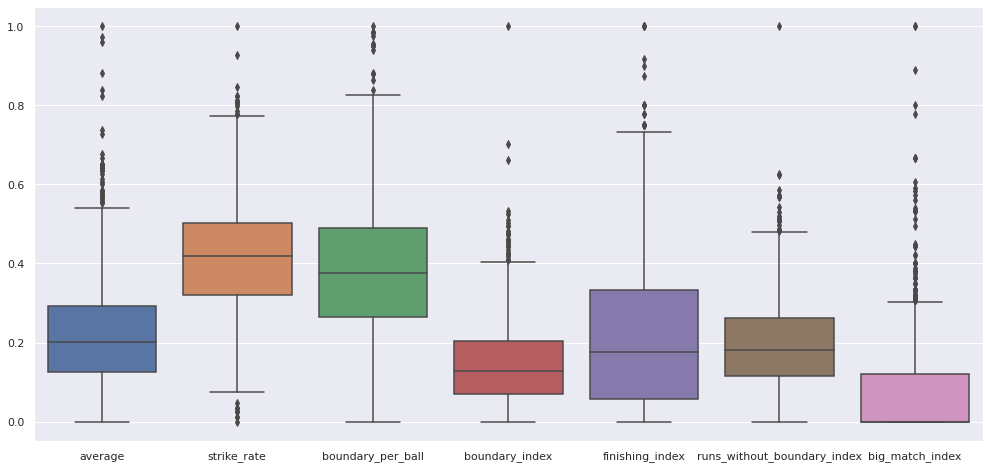

In [100]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_min_max_scaler)
plt.show()

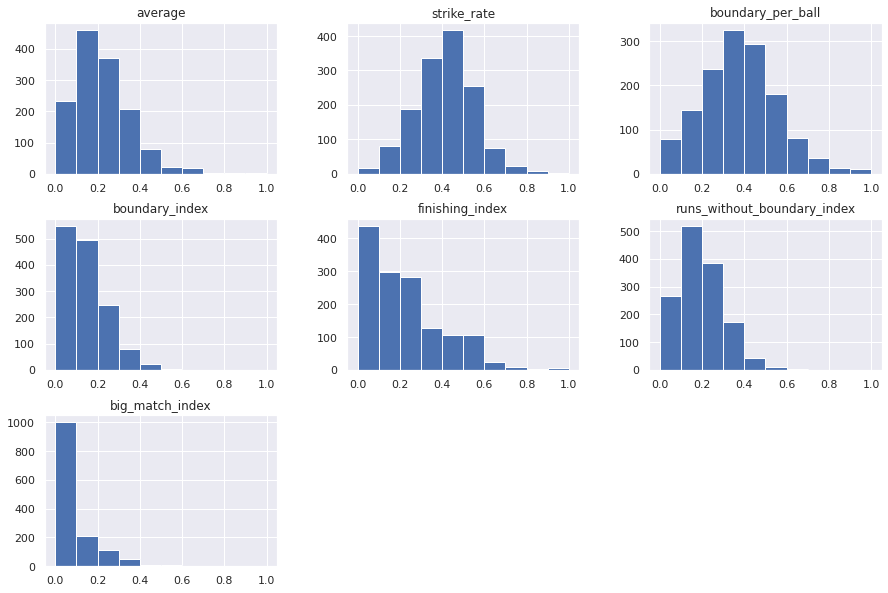

In [101]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_min_max_scaler.hist(ax=ax)
plt.show()

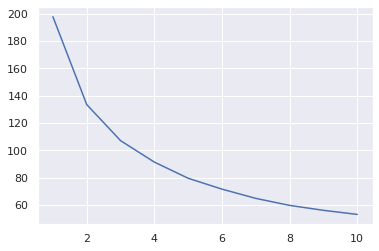

In [102]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_min_max_scaler)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()


In [103]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_min_max_scaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_min_max_scaler, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.2940837150088243
For n_clusters = 3 The average silhouette_score is : 0.2740130496840189
For n_clusters = 4 The average silhouette_score is : 0.2511657684313192
For n_clusters = 5 The average silhouette_score is : 0.2534408549984842
For n_clusters = 6 The average silhouette_score is : 0.24354689071863722
For n_clusters = 7 The average silhouette_score is : 0.23460994492990486
For n_clusters = 8 The average silhouette_score is : 0.2360157870809221
For n_clusters = 9 The average silhouette_score is : 0.22898897709261276
For n_clusters = 10 The average silhouette_score is : 0.2283444479401762


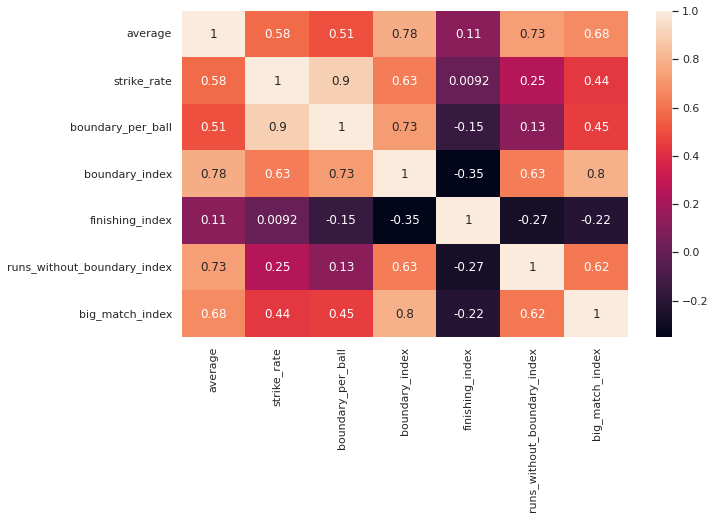

In [104]:
corr_min_max_scaler = batter_min_max_scaler.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_min_max_scaler,annot=True)

#### Normalization

In [105]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
batter_normalize= scaler.fit_transform(batter_for_clustering)

batter_normalize = pd.DataFrame(batter_normalize,columns = columns)
batter_normalize.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.165648,0.981048,0.001065,0.014462,0.002060,0.063276,0.000412
std,0.068008,0.016832,0.000328,0.008209,0.002139,0.030175,0.000678
min,0.038392,0.776093,0.000000,0.000000,0.000000,0.005806,0.000000
25%,0.115397,0.975212,0.000893,0.008139,0.000406,0.040258,0.000000
50%,0.154094,0.985737,0.001105,0.013417,0.001545,0.059584,0.000000
75%,0.203244,0.992081,0.001279,0.019826,0.002986,0.081159,0.000729
max,0.628665,0.998951,0.001995,0.062458,0.013658,0.218210,0.004353


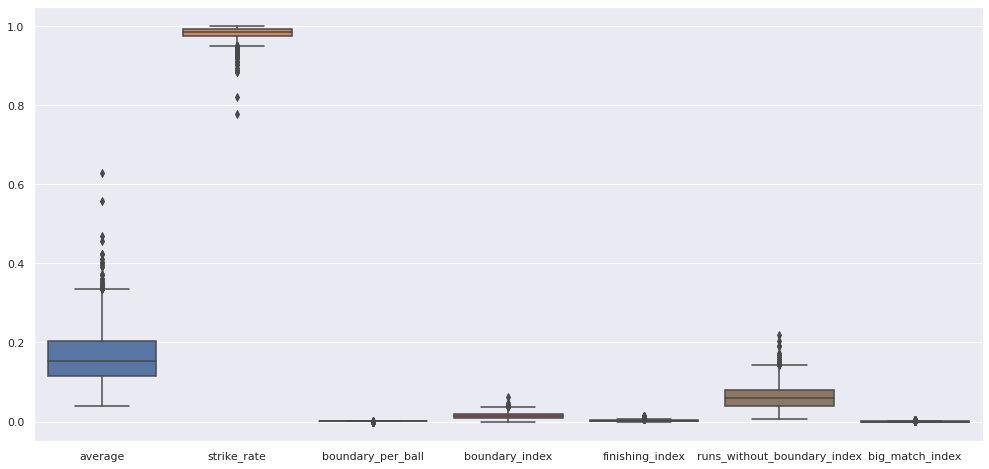

In [106]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_normalize)
plt.show()

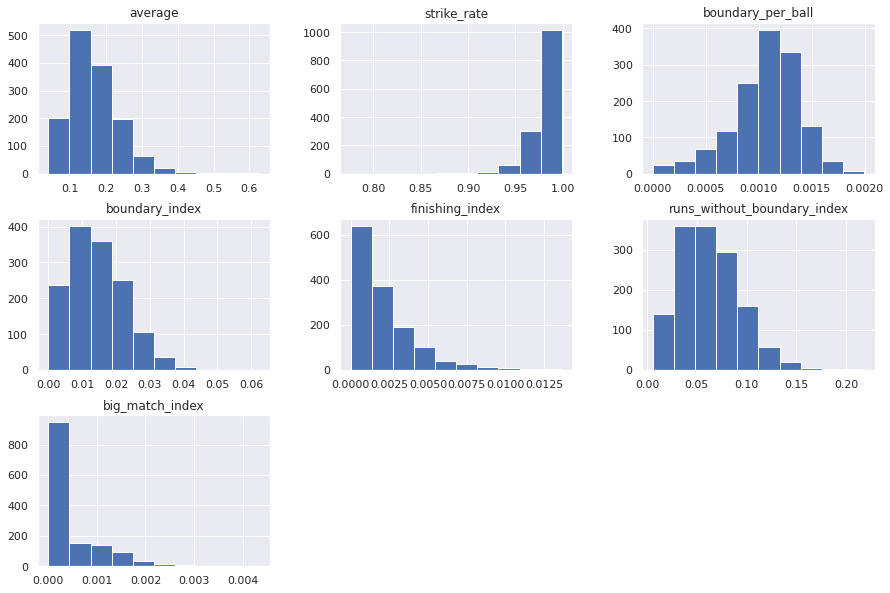

In [107]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_normalize.hist(ax=ax)
plt.show()

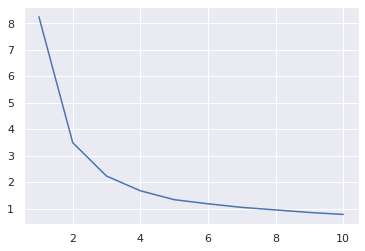

In [108]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_normalize)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [109]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_normalize)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_normalize, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5190221589678605
For n_clusters = 3 The average silhouette_score is : 0.44591080480696715
For n_clusters = 4 The average silhouette_score is : 0.4110382477340139
For n_clusters = 5 The average silhouette_score is : 0.3922727670116711
For n_clusters = 6 The average silhouette_score is : 0.35161795842267657
For n_clusters = 7 The average silhouette_score is : 0.32554657702742223
For n_clusters = 8 The average silhouette_score is : 0.3242250904400012
For n_clusters = 9 The average silhouette_score is : 0.32410962168503393
For n_clusters = 10 The average silhouette_score is : 0.304550045148415


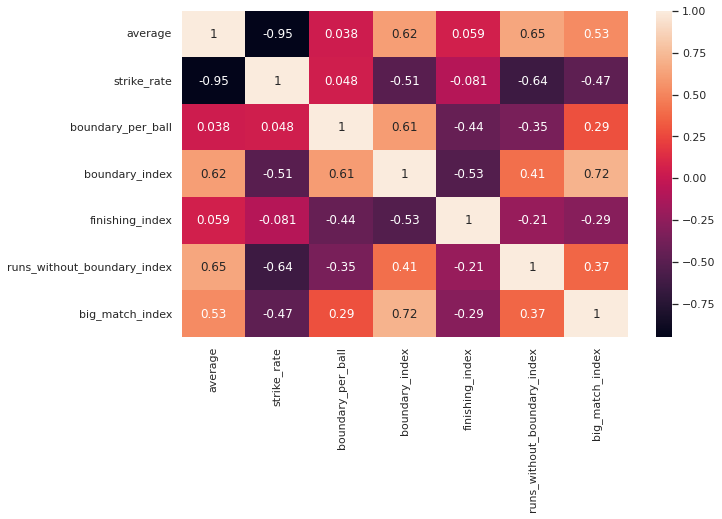

In [110]:
corr_normalize = batter_normalize.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_normalize,annot=True)

#### Robust Scaling

In [111]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
batter_robust= scaler.fit_transform(batter_for_clustering)

batter_robust = pd.DataFrame(batter_robust,columns = columns)
batter_robust.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.130858,-2.993245e-02,0.005483,0.139979,0.126643,0.108980,0.595094
std,0.800061,7.652353e-01,0.776761,0.765353,0.678216,0.726744,1.035547
min,-1.195151,-2.305323e+00,-1.670034,-0.944584,-0.637184,-1.231383,0.000000
25%,-0.452092,-5.393137e-01,-0.498316,-0.433249,-0.435018,-0.443651,0.000000
50%,0.000000,1.920122e-16,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.547908,4.606863e-01,0.501684,0.566751,0.564982,0.556349,1.000000
max,4.749316,3.189138e+00,2.760943,6.454660,2.972924,5.595631,8.241758


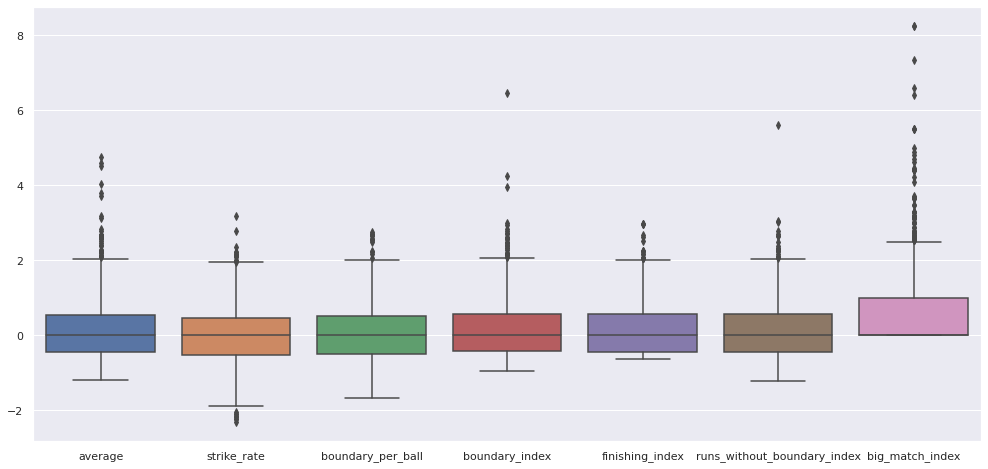

In [112]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_robust)
plt.show()

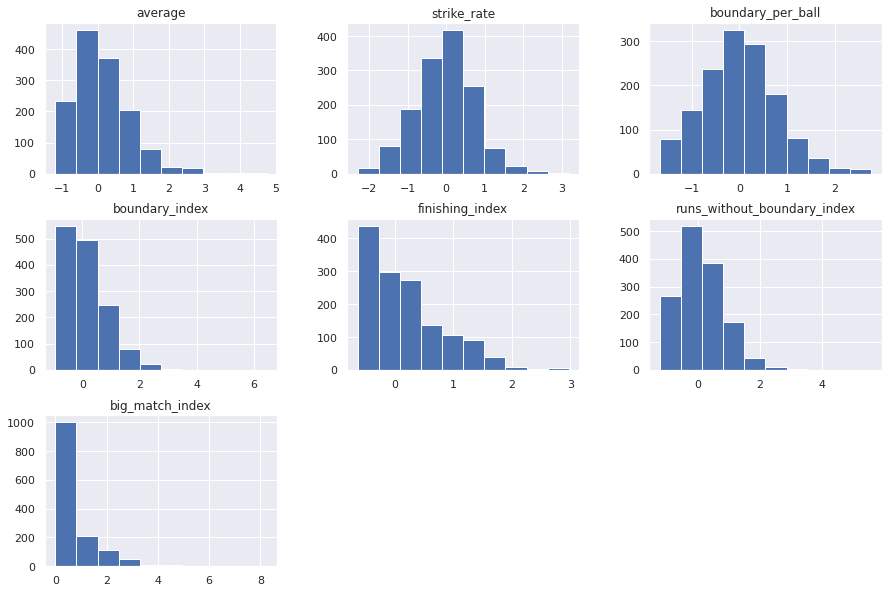

In [113]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_robust.hist(ax=ax)
plt.show()

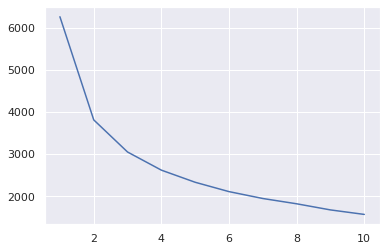

In [114]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_robust)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [115]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_robust)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_robust, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3749885094094654
For n_clusters = 3 The average silhouette_score is : 0.25801177391082614
For n_clusters = 4 The average silhouette_score is : 0.24862153129148673
For n_clusters = 5 The average silhouette_score is : 0.2332093698496589
For n_clusters = 6 The average silhouette_score is : 0.23411934712538351
For n_clusters = 7 The average silhouette_score is : 0.22515632909218686
For n_clusters = 8 The average silhouette_score is : 0.21542856632350812
For n_clusters = 9 The average silhouette_score is : 0.22620108102677267
For n_clusters = 10 The average silhouette_score is : 0.22227987951706962


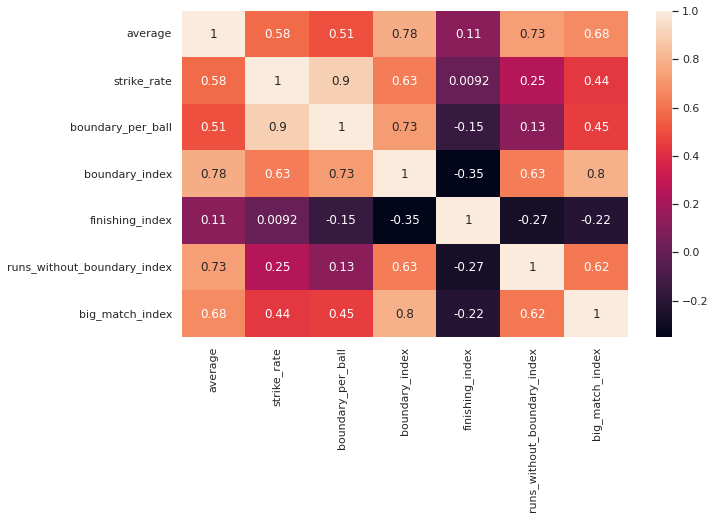

In [116]:
corr_robust = batter_robust.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_robust,annot=True)

#### Formula based *Normalisation*

In [117]:
batter_nn = batter_for_clustering.copy()
batter_nn['average'] = (batter_nn['average'] - np.min(batter_nn['average'])) / (np.max(batter_nn['average']) - np.min(batter_nn['average']))
batter_nn['strike_rate'] = (batter_nn['strike_rate'] - np.min(batter_nn['strike_rate'])) / (np.max(batter_nn['strike_rate']) - np.min(batter_nn['strike_rate']))
batter_nn['boundary_per_ball'] = (batter_nn['boundary_per_ball'] - np.min(batter_nn['boundary_per_ball'])) / (np.max(batter_nn['boundary_per_ball']) - np.min(batter_nn['boundary_per_ball']))
batter_nn['boundary_index'] = (batter_nn['boundary_index'] - np.min(batter_nn['boundary_index'])) / (np.max(batter_nn['boundary_index']) - np.min(batter_nn['boundary_index']))
batter_nn['finishing_index'] = (batter_nn['finishing_index'] - np.min(batter_nn['finishing_index'])) / (np.max(batter_nn['finishing_index']) - np.min(batter_nn['finishing_index']))
batter_nn['runs_without_boundary_index'] = (batter_nn['runs_without_boundary_index'] - np.min(batter_nn['runs_without_boundary_index'])) / (np.max(batter_nn['runs_without_boundary_index']) - np.min(batter_nn['runs_without_boundary_index']))
batter_nn['big_match_index'] = (batter_nn['big_match_index'] - np.min(batter_nn['big_match_index'])) / (np.max(batter_nn['big_match_index']) - np.min(batter_nn['big_match_index']))

In [118]:
batter_nn = pd.DataFrame(batter_nn,columns = columns)
batter_nn.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.223066,0.414124,0.378137,0.146578,0.211580,0.196332,0.072205
std,0.134589,0.139274,0.175302,0.103437,0.187866,0.106451,0.125646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.321416,0.264438,0.069106,0.056000,0.115385,0.000000
50%,0.201053,0.419572,0.376900,0.127660,0.176500,0.180369,0.000000
75%,0.293224,0.503418,0.490122,0.204255,0.333000,0.261862,0.121333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


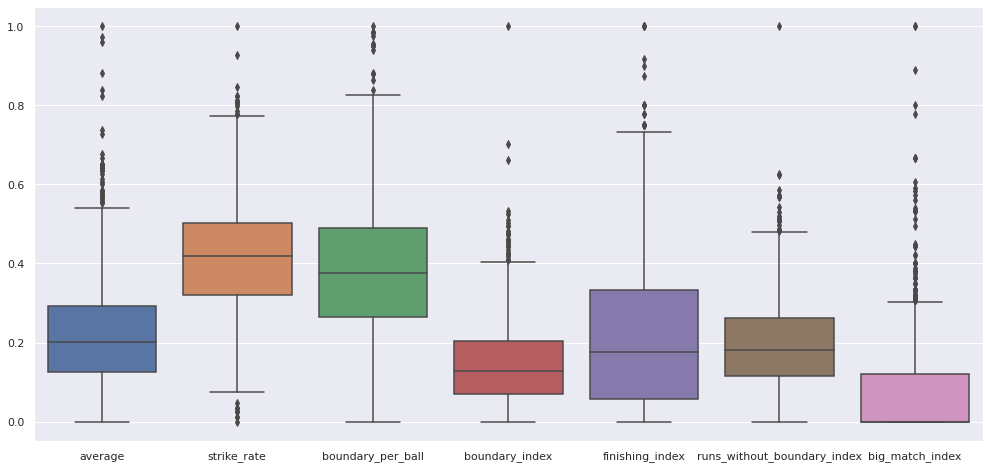

In [119]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_nn)
plt.show()

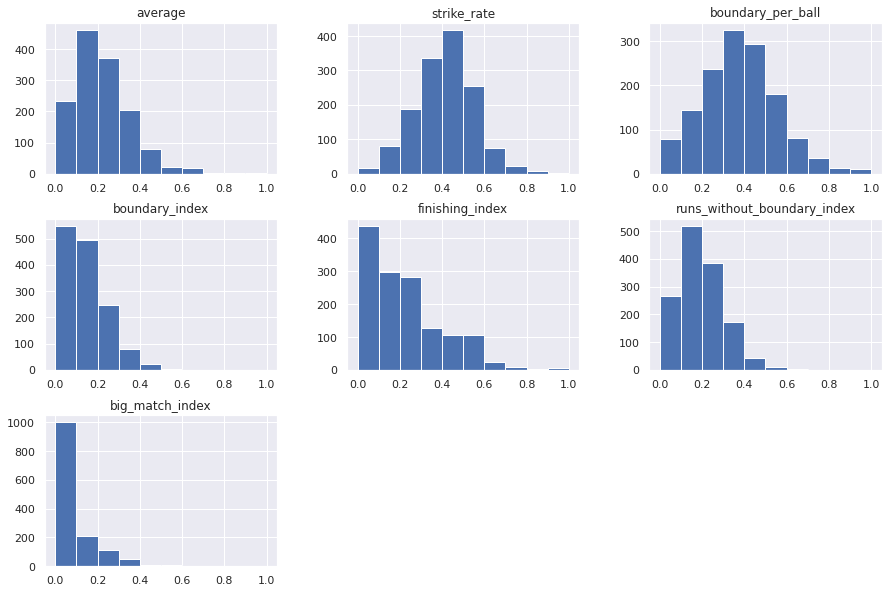

In [120]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_nn.hist(ax=ax)
plt.show()

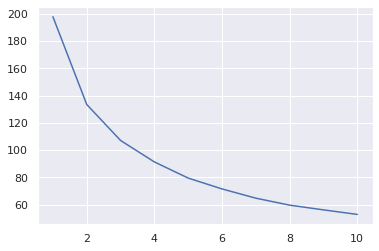

In [121]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_nn)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [122]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_nn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_nn, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.2940837150088243
For n_clusters = 3 The average silhouette_score is : 0.2740130496840189
For n_clusters = 4 The average silhouette_score is : 0.2511657684313192
For n_clusters = 5 The average silhouette_score is : 0.2534408549984842
For n_clusters = 6 The average silhouette_score is : 0.24354689071863722
For n_clusters = 7 The average silhouette_score is : 0.23460994492990486
For n_clusters = 8 The average silhouette_score is : 0.2360157870809221
For n_clusters = 9 The average silhouette_score is : 0.2289889770926127
For n_clusters = 10 The average silhouette_score is : 0.22834444794017617


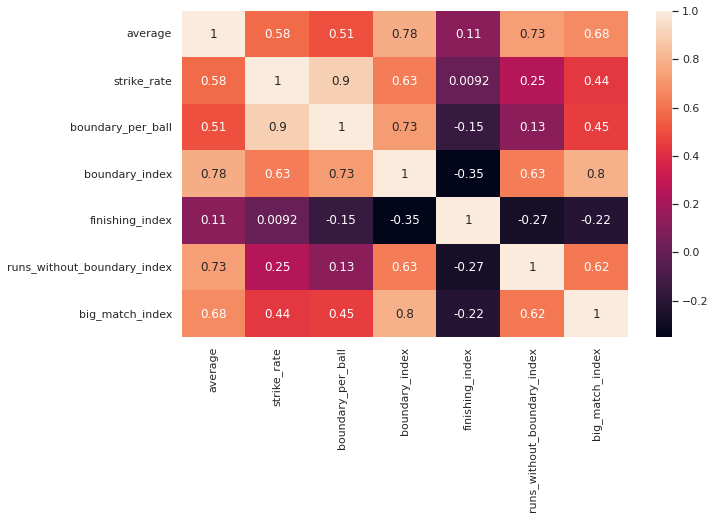

In [123]:
corr_nn = batter_nn.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_nn,annot=True)